In [1]:
# import SharedArray as sa
# ROBOT_TYPE_NAME = 'panda'
# sa.delete("shm://{}.prepared".format(ROBOT_TYPE_NAME))
# sa.delete("shm://{}.grasp_img".format(ROBOT_TYPE_NAME))
# sa.delete("shm://{}.arm_img".format(ROBOT_TYPE_NAME))
# sa.delete("shm://{}.rh_vals".format(ROBOT_TYPE_NAME))
# sa.delete("shm://{}.result".format(ROBOT_TYPE_NAME))
# sa.delete("shm://{}.query_in".format(ROBOT_TYPE_NAME))
# sa.delete("shm://{}.response_out".format(ROBOT_TYPE_NAME))
# sa.delete("shm://{}.query_quit".format(ROBOT_TYPE_NAME))

## Define printing function

In [6]:
from plot_scripts import *

## Print results

RES_ROOT: stowing-deep-result-btf-ik08-to2.0
DAT_DIR: 20210917-113211
CNAME_LIST: ['None', 'Tool', 'ToolReach', 'Full']
obj_1
obj_1_obs3
obj_1_obs5
obj_3
obj_3_pole
obj_3_hard
obj_1c_obs0
None files: 50
Tool files: 50
ToolReach files: 50
Full files: 50
================================================== obj_1c_obs0 ================================================== valid=50
Checker   :     Time  Actions   MP_tot       MP trials        MP fails   IK_tot       IK trials        IK fails  Fail(%)    Total
None      :     2.27      5.0     3.74     3.74(100.0)     0.52(10.32)     8.68     8.68(100.0)     5.28(44.18)      0.0       50
Tool      :     2.51     5.08     4.18     4.18(100.0)     0.76(10.98)    12.74     7.04(68.18)     3.12(26.22)      0.0       50
ToolReach :     2.29      5.0     3.98     3.98(100.0)      0.7(11.53)     11.4     5.24(61.76)     1.34(16.22)      0.0       50
Full      :     1.85      5.0     3.78     3.78(100.0)     0.48( 9.54)    19.92      5.7(42.56)     1.44

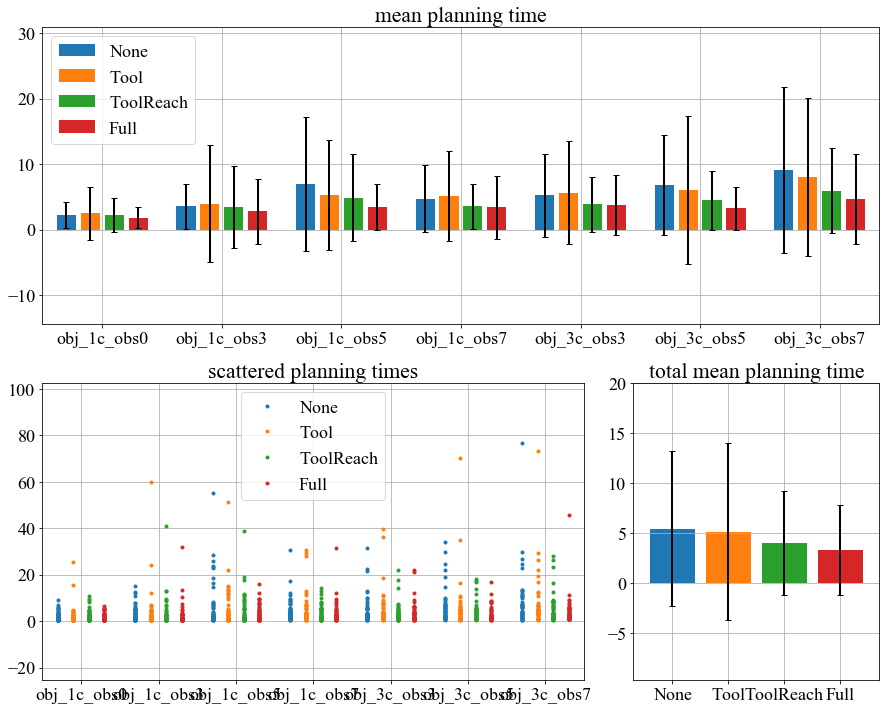

In [7]:
plt.rcParams['font.size'] = 18
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['lines.linewidth'] = 2
CNAME_LIST = ['None', 'Tool', 'ToolReach', 'Full']
resdat_all, res_dict_all = print_results(RES_ROOT="stowing-deep-result-btf-ik08-to2.0", 
                                         RTYPE="panda", 
                                         DAT_DIR='20210917-113211',
                                         CNAME_LIST=CNAME_LIST,
#                                          exp_list=['obj_1',
#                                                    'obj_1_obs3',
#                                                    'obj_1_obs5',
#                                                    'obj_3',
#                                                    'obj_3_pole',
#                                                    'obj_3_hard',
#                                                    'obj_1c_obs0',
#                                                    'obj_1c_obs3',
#                                                    'obj_1c_obs5',
#                                                    'obj_1c_obs7',
#                                                    'obj_3c_obs3',
#                                                    'obj_3c_obs5']
                                        )
plot_times(resdat_all, CHECKERS=CNAME_LIST)

Text(0.5,1,'success ratios tot')

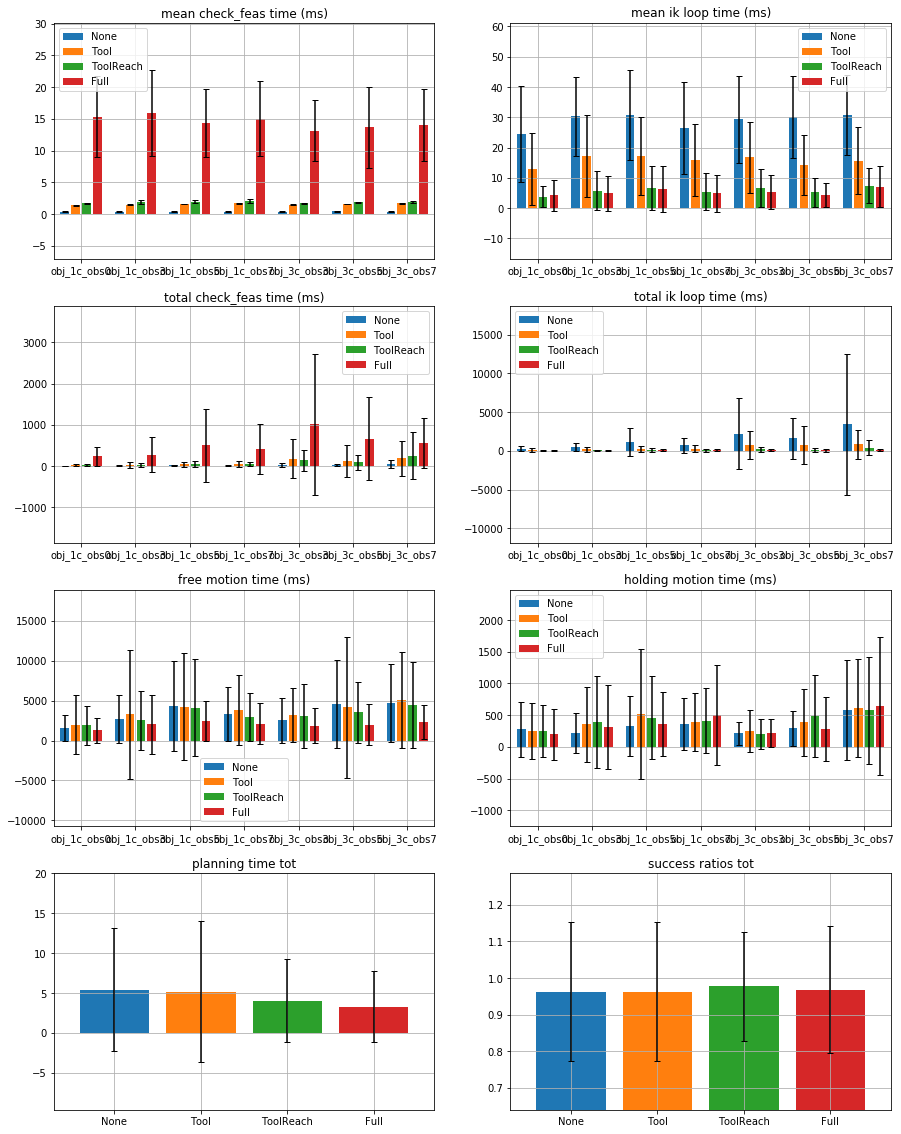

In [3]:
scatter = False

plt.figure(figsize=(15,20))
plt.subplot(4,2,1)
plot_valid(resdat_all, keys=["time_log", "check_feas"], fn=np.mean, scatter=scatter, CHECKERS=CNAME_LIST)
plt.title("mean check_feas time (ms)")
plt.subplot(4,2,2)
plot_valid(resdat_all, keys=["time_log", "ik_loop"], fn=np.mean, scatter=scatter, CHECKERS=CNAME_LIST)
plt.title("mean ik loop time (ms)")

plt.subplot(4,2,3)
plot_valid(resdat_all, keys=["time_log", "check_feas"], fn=np.sum, scatter=scatter, CHECKERS=CNAME_LIST)
plt.title("total check_feas time (ms)")
plt.subplot(4,2,4)
plot_valid(resdat_all, keys=["time_log", "ik_loop"], fn=np.sum, scatter=scatter, CHECKERS=CNAME_LIST)
plt.title("total ik loop time (ms)")

plt.subplot(4,2,5)
fm_dict = plot_valid(resdat_all, keys=['time_log', "free_motion_gen"], fn=np.sum, scatter=scatter, CHECKERS=CNAME_LIST)
plt.title("free motion time (ms)")
plt.subplot(4,2,6)
plot_valid(resdat_all, keys=['time_log', "holding_motion_gen"], fn=np.sum, scatter=scatter, CHECKERS=CNAME_LIST)
plt.title("holding motion time (ms)")

plt.subplot(4,2,7)
time_dict = plot_valid(resdat_all, keys=["plan_time"], average_all=True, CHECKERS=CNAME_LIST)
plt.title("planning time tot")
plt.subplot(4,2,8)
succ_dict = extract_values(resdat_all, ["success"])
_ = grouped_bar(succ_dict, average_all=True, options=CNAME_LIST)
plt.title("success ratios tot")

In [4]:
XLABEL_DICT = {'None':'None', 'Tool':'Step 1', 'ToolReach': 'Step 2', 'Full': 'Step 3'}
XLABEL_LIST = ['None', 'Step 1', 'Step 2', 'Step 3']

In [5]:
for resdict in resdat_all.values():
    for k, v in resdict.items():
        resdict[XLABEL_DICT[k]] = v

(-5, 15)

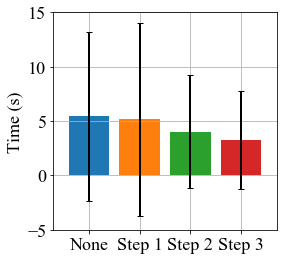

In [31]:
plt.rcParams['font.size'] = 18
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['lines.linewidth'] = 2

fig = plt.figure(figsize=(4,4))
ax = plt.subplot(1,1,1)

time_dict = plot_valid(resdat_all, keys=["plan_time"], average_all=True, CHECKERS=XLABEL_LIST)
plt.ylabel("Time (s)")
plt.ylim(-5,15)
# plt.title("planning time tot")

(80, 100)

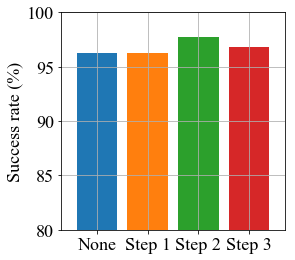

In [30]:
plt.rcParams['font.size'] = 18
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['lines.linewidth'] = 2

fig = plt.figure(figsize=(4,4))
ax = plt.subplot(1,1,1)

succ_dict = extract_values(resdat_all, ["success"])
for k, v in succ_dict.items():
    for kk, vv in v.items():
        v[kk] = np.multiply(np.array(vv, dtype=np.float), 100)
_ = grouped_bar(succ_dict, average_all=True, options=XLABEL_LIST, show_bar=False)
plt.ylabel("Success rate (%)")
plt.ylim(80,100)
# plt.title("success ratios tot")

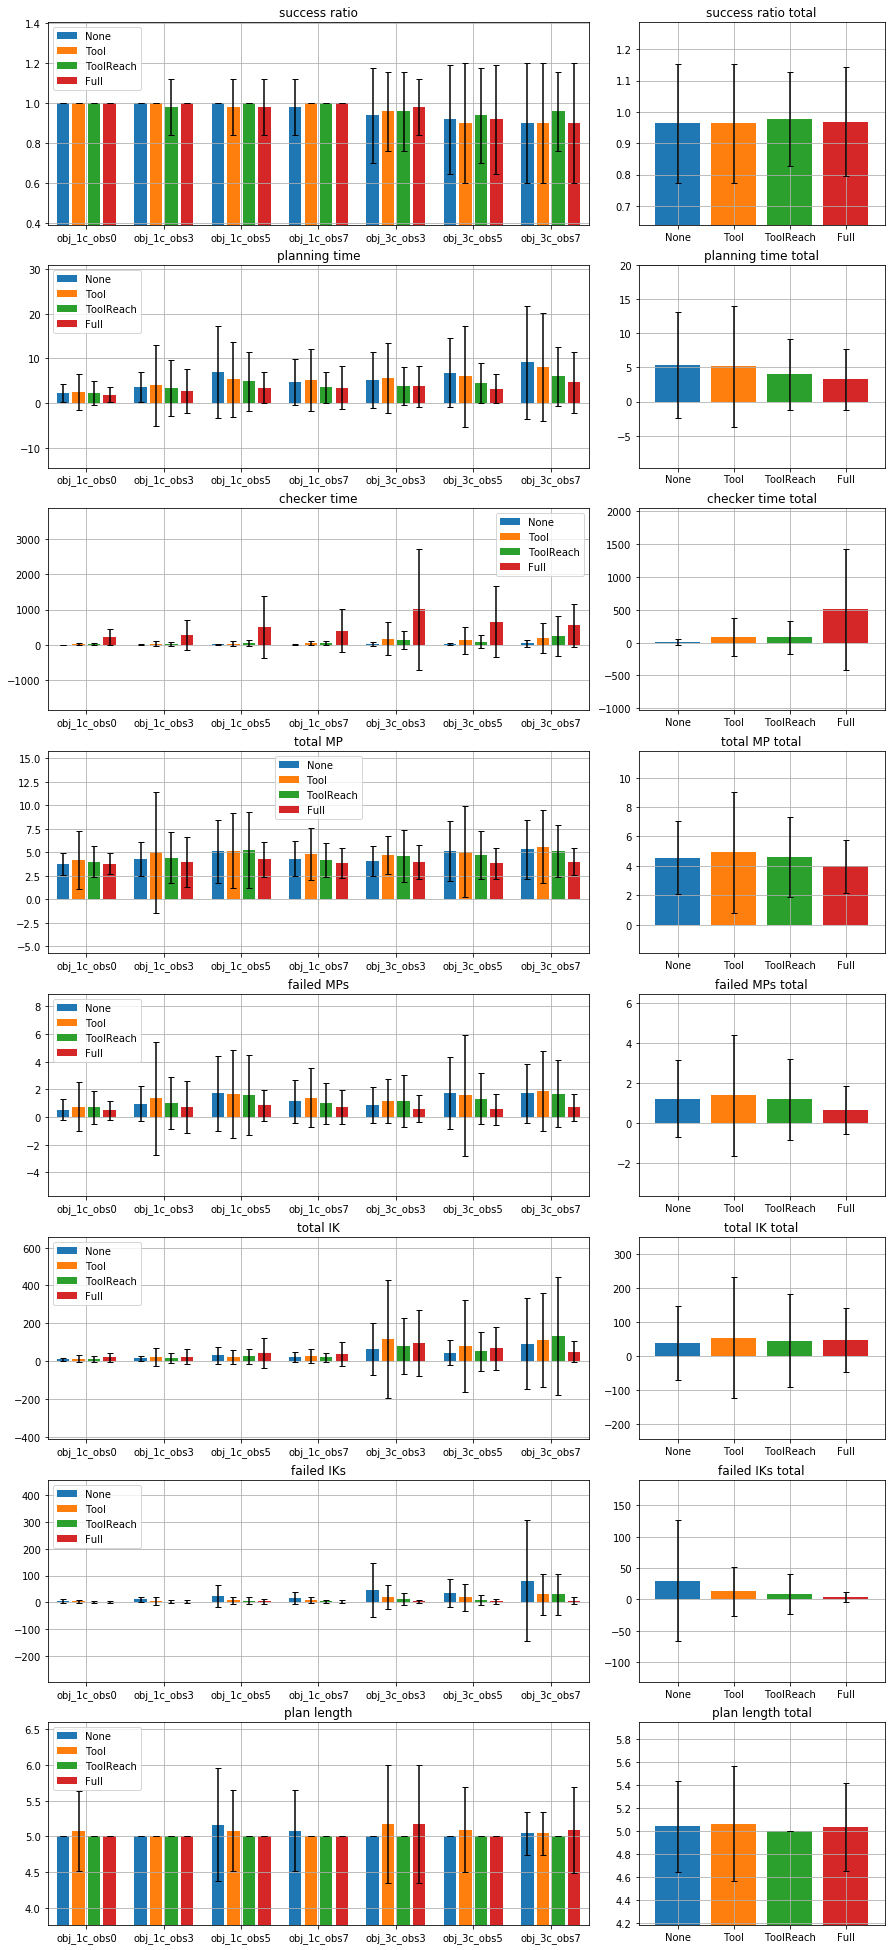

In [4]:
plt.figure(figsize=(15,35))

ROWS = 8
COLS = 3   
    
succ_dict = extract_values(resdat_all, ["success"])
subplot_trisect_line(ROWS, COLS, 1, succ_dict, "success ratio", options=CNAME_LIST)
subplot_trisect_line(ROWS, COLS, 2, extract_valid(resdat_all, ["plan_time"]), "planning time", options=CNAME_LIST)
subplot_trisect_line(ROWS, COLS, 3, 
                     extract_valid(resdat_all, ["time_log", "check_feas"], fn=np.sum), "checker time", options=CNAME_LIST)
subplot_trisect_line(ROWS, COLS, 4, extract_valid(resdat_all, ["MP_tot"]), "total MP", options=CNAME_LIST)
subplot_trisect_line(ROWS, COLS, 5, extract_valid(resdat_all, ["failed_MPs"]), "failed MPs", options=CNAME_LIST)
subplot_trisect_line(ROWS, COLS, 6, extract_valid(resdat_all, ["IK_tot"]), "total IK", options=CNAME_LIST)
subplot_trisect_line(ROWS, COLS, 7, extract_valid(resdat_all, ["failed_IKs"]), "failed IKs", options=CNAME_LIST)
subplot_trisect_line(ROWS, COLS, 8, extract_valid(resdat_all, ["length"]), "plan length", options=CNAME_LIST)

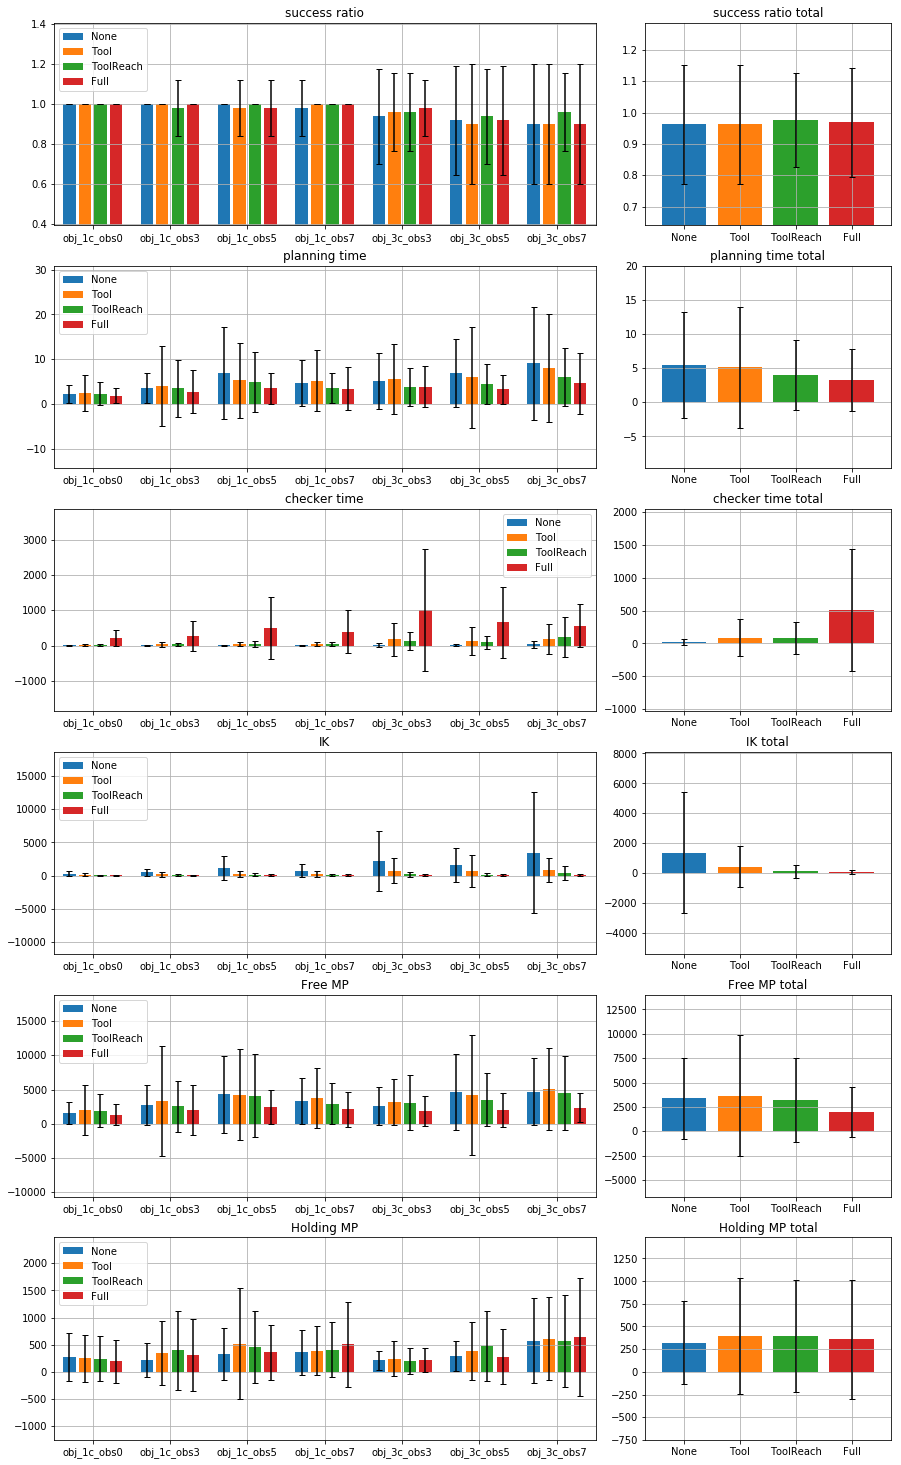

In [15]:
plt.figure(figsize=(15,35))

ROWS = 8
COLS = 3   
    
succ_dict = extract_values(resdat_all, ["success"])
subplot_trisect_line(ROWS, COLS, 1, succ_dict, "success ratio", options=CNAME_LIST)
subplot_trisect_line(ROWS, COLS, 2, extract_valid(resdat_all, ["plan_time"]), "planning time", options=CNAME_LIST)
subplot_trisect_line(ROWS, COLS, 3, 
                     extract_valid(resdat_all, ["time_log", "check_feas"], fn=np.sum), "checker time", options=CNAME_LIST)
subplot_trisect_line(ROWS, COLS, 4, 
                     extract_valid(resdat_all, ["time_log", "ik_loop"], fn=np.sum), "IK", options=CNAME_LIST)
subplot_trisect_line(ROWS, COLS, 5, 
                     extract_valid(resdat_all, ["time_log", "free_motion_gen"], fn=np.sum), "Free MP", options=CNAME_LIST)
subplot_trisect_line(ROWS, COLS, 6, 
                     extract_valid(resdat_all, ["time_log", "holding_motion_gen"], fn=np.sum), "Holding MP", options=CNAME_LIST)

In [55]:
times_full = extract_valid(resdat_all, ["plan_time"])
times_check = extract_valid(resdat_all, ["time_log", "check_feas"], fn=np.mean)
times_ik = extract_valid(resdat_all, ["time_log", "ik_loop"], fn=np.sum)
times_fm = extract_valid(resdat_all, ["time_log", "free_motion_gen"], fn=np.sum)
times_hm = extract_valid(resdat_all, ["time_log", "holding_motion_gen"], fn=np.sum)
times_mp = {}
for case in times_fm.keys():
    times_case = {}
    for cname in CNAME_LIST:
        times_case[cname] = np.add(times_fm[case][cname], times_hm[case][cname])
    times_mp[case] = times_case

In [56]:
XLABEL_DICT = {'None':'None', 'Tool':'Step 1', 'ToolReach': 'Step 2', 'Full': 'Step 3'}
XLABEL_LIST = ['None', 'Step 1', 'Step 2', 'Step 3']

In [57]:
for times_dict in [times_full, times_check, times_ik, times_mp]:
    times_dict_new = {}
    for case in times_dict.keys():
        times_case = {}
        for cname in CNAME_LIST:
            times_case[XLABEL_DICT[cname]] = times_dict[case][cname]
        times_dict_new[case] = times_case
    times_dict.clear()
    times_dict.update(times_dict_new)

In [58]:
for times_dict in [times_check, times_ik, times_mp]:
    for case in times_dict.keys():
        for cname in XLABEL_LIST:
            times_dict[case][cname] /= 1000

Text(0.5,1,'Motion planning (ms)')

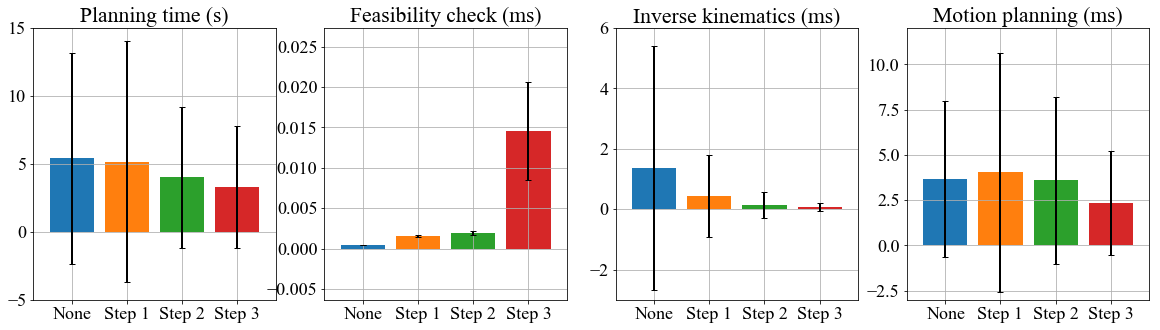

In [60]:
plt.rcParams['font.size'] = 18
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['lines.linewidth'] = 2
plt.figure(figsize=(20,5))
plt.subplot(1,4,1)
_ = grouped_bar(times_full, average_all=True, options=XLABEL_LIST, show_bar=True)
plt.ylim(-5,15)
plt.title("Planning time (s)")
plt.subplot(1,4,2)
_ = grouped_bar(times_check, average_all=True, options=XLABEL_LIST, show_bar=True)
# plt.ylim(-0.500,1.500)
plt.title("Feasibility check (ms)")
plt.subplot(1,4,3)
_ = grouped_bar(times_ik, average_all=True, options=XLABEL_LIST, show_bar=True)
plt.ylim(-3.000,6.000)
plt.title("Inverse kinematics (ms)")
plt.subplot(1,4,4)
_ = grouped_bar(times_mp, average_all=True, options=XLABEL_LIST, show_bar=True)
plt.ylim(-3.000,12.000)
plt.title("Motion planning (ms)")

'(2, 3)'

In [70]:
times_full_new = {}
for case in times_full.keys():
    times_full_new[str((int(case[4])-1, int(case[-1])))] = times_full[case]

(-7, 25)

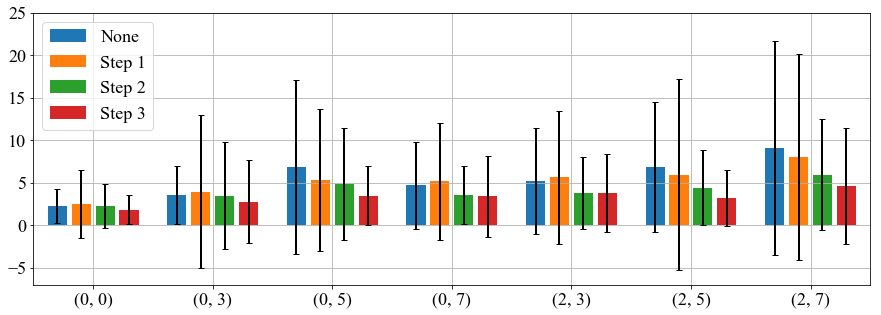

In [71]:
plt.figure(figsize=(15, 5))
_ = grouped_bar(times_full_new, average_all=False, options=XLABEL_LIST, show_bar=True)
plt.ylim(-7, 25)

In [5]:
print("="*80)
success_vecs = [np.concatenate(map(lambda x: x[cname], succ_dict.values())) for cname in CNAME_LIST]
success_means = map(np.mean, success_vecs)
max_val = np.max(success_means)
max_idc = np.where(success_means==max_val)[0]
print("MP_TIMES: ", "  ".join(map(lambda x:"{:5}".format(x), CNAME_LIST)))
print("success: ", "  ".join(map(lambda x:"{:5.03}".format(x), success_means)))
print("best: {} ({:5.3})".format(np.array(CNAME_LIST)[max_idc], max_val))
print("-"*80)
time_vecs = [np.concatenate(map(lambda x: x[cname], time_dict.values())) for cname in CNAME_LIST]
time_means = np.array(map(np.mean, time_vecs))
min_val = np.min(time_means[max_idc])
min_idc = np.where(time_means[max_idc]==min_val)[0]
print("MP_TIMES: ", "  ".join(map(lambda x:"{:5}".format(x), CNAME_LIST)))
print("times  : ", "  ".join(map(lambda x:"{:5.03}".format(x), time_means)))
print("best: {} ({:5.3})".format(np.array(CNAME_LIST)[max_idc][min_idc], min_val))
print("="*80)

('MP_TIMES: ', 'None   Tool   ToolReach  Full ')
('success: ', '0.963  0.963  0.977  0.969')
best: ['ToolReach'] (0.977)
--------------------------------------------------------------------------------
('MP_TIMES: ', 'None   Tool   ToolReach  Full ')
('times  : ', ' 5.43   5.16   4.02   3.28')
best: ['ToolReach'] ( 4.02)


In [4]:
(1 - 5.16 / 5.43 )*100

4.972375690607722

#### stowing-deep-result-btf-ik08-to2.0-bak-1005-step03replaced-with-noMPprefilter-res
```
================================================================================
('MP_TIMES: ', 'None   Tool   ToolReach  Full ')
('success: ', '0.974  0.971  0.969  0.974')
best: ['None' 'Full'] (0.974)
--------------------------------------------------------------------------------
('MP_TIMES: ', 'None   Tool   ToolReach  Full ')
('times  : ', ' 6.45    5.1   4.61   3.87')
best: ['Full'] ( 3.87)
================================================================================
```
#### stowing-deep-result-btf-ik08-to2.0-all-noMPprefilter
```
================================================================================
('MP_TIMES: ', 'None   Tool   ToolReach  Full ')
('success: ', '0.957  0.977  0.977  0.969')
best: ['Tool' 'ToolReach'] (0.977)
--------------------------------------------------------------------------------
('MP_TIMES: ', 'None   Tool   ToolReach  Full ')
('times  : ', ' 4.72    4.0   4.11   3.76')
best: ['Tool'] (  4.0)
================================================================================
```